# Flight Data Project

### 1 EDA & Data Cleaning

Import packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read the data. You can select and download similar data here: https://www.transtats.bts.gov/DL_SelectFields.aspx?gnoyr_VQ=GEE&QO_fu146_anzr=Nv4%20Pn44vr45

In [3]:
data = pd.read_csv('../data/flight_data.csv')

Get data info

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440751 entries, 0 to 440750
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   DEPARTURES_SCHEDULED  440751 non-null  float64
 1   DEPARTURES_PERFORMED  440751 non-null  float64
 2   PAYLOAD               440751 non-null  float64
 3   SEATS                 440751 non-null  float64
 4   PASSENGERS            440751 non-null  float64
 5   FREIGHT               440751 non-null  float64
 6   MAIL                  440751 non-null  float64
 7   DISTANCE              440751 non-null  float64
 8   RAMP_TO_RAMP          440751 non-null  float64
 9   AIR_TIME              440751 non-null  float64
 10  UNIQUE_CARRIER        440751 non-null  object 
 11  UNIQUE_CARRIER_NAME   440751 non-null  object 
 12  CARRIER_GROUP         440751 non-null  int64  
 13  ORIGIN_AIRPORT_ID     440751 non-null  int64  
 14  ORIGIN                440751 non-null  object 
 15  

In [5]:
data.head()

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,AIR_TIME,...,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,AIRCRAFT_TYPE,AIRCRAFT_CONFIG,YEAR,MONTH
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,...,13930,ORD,"Chicago, IL",13232,MDW,"Chicago, IL",622,1,2024,10
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,10613,BID,"Block Island, RI",15855,WST,"Westerly, RI",79,1,2024,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,10613,BID,"Block Island, RI",15855,WST,"Westerly, RI",79,1,2024,7
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,10613,BID,"Block Island, RI",15855,WST,"Westerly, RI",79,1,2024,8
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,10613,BID,"Block Island, RI",15855,WST,"Westerly, RI",79,1,2024,12


In [6]:
data.tail()

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,AIR_TIME,...,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,AIRCRAFT_TYPE,AIRCRAFT_CONFIG,YEAR,MONTH
440746,989.0,987.0,2902800.0,8892.0,5602.0,8038.0,0.0,59.0,38105.0,28285.0,...,10299,ANC,"Anchorage, AK",11555,ENA,"Kenai, AK",416,1,2024,8
440747,995.0,994.0,2737200.0,8946.0,7247.0,10718.0,0.0,59.0,37921.0,27463.0,...,10299,ANC,"Anchorage, AK",11555,ENA,"Kenai, AK",416,1,2024,7
440748,999.0,998.0,2748200.0,8991.0,6631.0,5663.0,0.0,59.0,39218.0,30137.0,...,11555,ENA,"Kenai, AK",10299,ANC,"Anchorage, AK",416,1,2024,7
440749,1522.0,1522.0,1826400.0,8026.0,5084.0,10340.0,0.0,11.0,17768.0,13202.0,...,15215,TIQ,"Tinian, TT",14955,SPN,"Saipan, TT",79,1,2024,7
440750,1574.0,1574.0,1888800.0,8284.0,5104.0,29100.0,0.0,11.0,20390.0,15668.0,...,14955,SPN,"Saipan, TT",15215,TIQ,"Tinian, TT",79,1,2024,7


In [7]:
data.isna().sum()

DEPARTURES_SCHEDULED    0
DEPARTURES_PERFORMED    0
PAYLOAD                 0
SEATS                   0
PASSENGERS              0
FREIGHT                 0
MAIL                    0
DISTANCE                0
RAMP_TO_RAMP            0
AIR_TIME                0
UNIQUE_CARRIER          0
UNIQUE_CARRIER_NAME     0
CARRIER_GROUP           0
ORIGIN_AIRPORT_ID       0
ORIGIN                  0
ORIGIN_CITY_NAME        0
DEST_AIRPORT_ID         0
DEST                    0
DEST_CITY_NAME          0
AIRCRAFT_TYPE           0
AIRCRAFT_CONFIG         0
YEAR                    0
MONTH                   0
dtype: int64

In [8]:
data.columns = [x.lower() for x in data.columns.to_list()]
data.columns

Index(['departures_scheduled', 'departures_performed', 'payload', 'seats',
       'passengers', 'freight', 'mail', 'distance', 'ramp_to_ramp', 'air_time',
       'unique_carrier', 'unique_carrier_name', 'carrier_group',
       'origin_airport_id', 'origin', 'origin_city_name', 'dest_airport_id',
       'dest', 'dest_city_name', 'aircraft_type', 'aircraft_config', 'year',
       'month'],
      dtype='object')

...using departures_performed as departures_scheduled have more null values

In [9]:
data["avg_passengers_per_flight"] = (
    (data["passengers"] / data["departures_performed"].replace(0, np.nan))
    .round(0)
    .astype("Int64")
)

In [10]:
data["avg_seats_per_flight"] = (
    (data["seats"] / data["departures_performed"].replace(0, np.nan))
    .round(0)
    .astype("Int64")
)

In [11]:
data.tail()

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,origin_city_name,dest_airport_id,dest,dest_city_name,aircraft_type,aircraft_config,year,month,avg_passengers_per_flight,avg_seats_per_flight
440746,989.0,987.0,2902800.0,8892.0,5602.0,8038.0,0.0,59.0,38105.0,28285.0,...,"Anchorage, AK",11555,ENA,"Kenai, AK",416,1,2024,8,6,9
440747,995.0,994.0,2737200.0,8946.0,7247.0,10718.0,0.0,59.0,37921.0,27463.0,...,"Anchorage, AK",11555,ENA,"Kenai, AK",416,1,2024,7,7,9
440748,999.0,998.0,2748200.0,8991.0,6631.0,5663.0,0.0,59.0,39218.0,30137.0,...,"Kenai, AK",10299,ANC,"Anchorage, AK",416,1,2024,7,7,9
440749,1522.0,1522.0,1826400.0,8026.0,5084.0,10340.0,0.0,11.0,17768.0,13202.0,...,"Tinian, TT",14955,SPN,"Saipan, TT",79,1,2024,7,3,5
440750,1574.0,1574.0,1888800.0,8284.0,5104.0,29100.0,0.0,11.0,20390.0,15668.0,...,"Saipan, TT",15215,TIQ,"Tinian, TT",79,1,2024,7,3,5


In [12]:
data[data["aircraft_type"] == 887].tail()

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,origin_city_name,dest_airport_id,dest,dest_city_name,aircraft_type,aircraft_config,year,month,avg_passengers_per_flight,avg_seats_per_flight
405864,60.0,60.0,5093200.0,14039.0,13452.0,1186025.0,2251.0,3784.0,24833.0,23152.0,...,"Honolulu, HI",11298,DFW,"Dallas/Fort Worth, TX",887,1,2024,4,224,234
405865,60.0,60.0,5094000.0,14040.0,13693.0,1221164.0,1366.0,3784.0,25832.0,24220.0,...,"Honolulu, HI",11298,DFW,"Dallas/Fort Worth, TX",887,1,2024,7,228,234
407269,61.0,61.0,5178900.0,14274.0,13732.0,828048.0,2953.0,3784.0,28482.0,26837.0,...,"Dallas/Fort Worth, TX",12173,HNL,"Honolulu, HI",887,1,2024,7,225,234
420678,82.0,82.0,6961000.0,19188.0,17523.0,644652.0,615.0,2342.0,27591.0,24755.0,...,"Miami, FL",12892,LAX,"Los Angeles, CA",887,1,2024,5,214,234
421237,83.0,83.0,7046300.0,19422.0,17759.0,754631.0,10856.0,2342.0,23041.0,20274.0,...,"Los Angeles, CA",13303,MIA,"Miami, FL",887,1,2024,5,214,234


In [13]:
data.describe()

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,carrier_group,origin_airport_id,dest_airport_id,aircraft_type,aircraft_config,year,month,avg_passengers_per_flight,avg_seats_per_flight
count,440751.000000,440751.000000,4.407510e+05,440751.000000,440751.000000,4.407510e+05,4.407510e+05,440751.000000,440751.000000,440751.000000,440751.000000,440751.000000,440751.000000,440751.000000,440751.000000,440751.0,440751.000000,439891.0,439891.0
mean,19.479345,20.087244,7.366505e+05,2407.468793,1949.990149,6.354306e+04,2.638118e+03,768.300040,2631.662465,2136.808293,2.581895,12764.039240,12761.797929,634.727724,1.142303,2024.0,6.575504,86.327208,114.726655
std,33.681686,33.100850,1.375799e+06,4547.112330,3812.564110,4.714950e+05,3.434086e+04,638.189156,4548.022006,3854.597995,0.758462,1582.923385,1579.855683,170.938409,0.437672,0.0,3.432239,64.721131,75.667556
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,10001.000000,10001.000000,26.000000,1.000000,2024.0,1.000000,0.0,0.0
25%,1.000000,1.000000,4.480000e+04,81.000000,32.000000,0.000000e+00,0.000000e+00,288.000000,174.000000,139.000000,2.000000,11292.000000,11292.000000,614.000000,1.000000,2024.0,4.000000,6.0,50.0
50%,7.000000,8.000000,2.380000e+05,572.000000,442.000000,0.000000e+00,0.000000e+00,630.000000,892.000000,699.000000,3.000000,12889.000000,12889.000000,673.000000,1.000000,2024.0,7.000000,97.0,143.0
75%,26.000000,27.000000,9.114000e+05,3040.000000,2403.500000,1.120000e+03,0.000000e+00,1047.000000,3305.000000,2582.000000,3.000000,14100.000000,14100.000000,699.000000,1.000000,2024.0,10.000000,142.0,176.0
max,1574.000000,1574.000000,4.953270e+07,83712.000000,72783.000000,4.129528e+07,3.108694e+06,7360.000000,103896.000000,94868.000000,3.000000,17058.000000,17058.000000,889.000000,4.000000,2024.0,12.000000,489.0,509.0


In [14]:
data.nunique()

departures_scheduled            511
departures_performed            510
payload                      104338
seats                         13722
passengers                    19395
freight                       54338
mail                          14855
distance                       2589
ramp_to_ramp                  22149
air_time                      19542
unique_carrier                  200
unique_carrier_name             200
carrier_group                     4
origin_airport_id              1338
origin                         1338
origin_city_name               1199
dest_airport_id                1340
dest                           1340
dest_city_name                 1207
aircraft_type                   157
aircraft_config                   4
year                              1
month                            12
avg_passengers_per_flight       372
avg_seats_per_flight            309
dtype: int64

In [15]:
data.loc[data["avg_seats_per_flight"].idxmax()]

departures_scheduled                               0.0
departures_performed                               1.0
payload                                       138114.0
seats                                            509.0
passengers                                       239.0
freight                                        17153.0
mail                                               0.0
distance                                         187.0
ramp_to_ramp                                       0.0
air_time                                           0.0
unique_carrier                                      LH
unique_carrier_name          Lufthansa German Airlines
carrier_group                                        0
origin_airport_id                                12478
origin                                             JFK
origin_city_name                          New York, NY
dest_airport_id                                  10721
dest                                               BOS
dest_city_

In [16]:
data.loc[data["avg_passengers_per_flight"].idxmax()]

departures_scheduled                               0.0
departures_performed                               1.0
payload                                       138114.0
seats                                            509.0
passengers                                       489.0
freight                                            0.0
mail                                               0.0
distance                                         413.0
ramp_to_ramp                                       0.0
air_time                                           0.0
unique_carrier                                      LH
unique_carrier_name          Lufthansa German Airlines
carrier_group                                        0
origin_airport_id                                12264
origin                                             IAD
origin_city_name                        Washington, DC
dest_airport_id                                  10721
dest                                               BOS
dest_city_

In [17]:
# Scheduled Departures to be deleted?

In [18]:
# Top 10 Seats
data.nlargest(10, "avg_seats_per_flight")


,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,origin_city_name,dest_airport_id,dest,dest_city_name,aircraft_type,aircraft_config,year,month,avg_passengers_per_flight,avg_seats_per_flight
58833,0.0,1.0,138114.0,509.0,239.0,17153.0,0.0,187.0,0.0,0.0,...,"New York, NY",10721,BOS,"Boston, MA",882,1,2024,10,239,509
58834,0.0,1.0,138114.0,509.0,261.0,14938.0,0.0,413.0,0.0,0.0,...,"Boston, MA",12264,IAD,"Washington, DC",882,1,2024,8,261,509
58835,0.0,1.0,138114.0,509.0,473.0,4.0,0.0,228.0,0.0,0.0,...,"New York, NY",12264,IAD,"Washington, DC",882,1,2024,8,473,509
58836,0.0,1.0,138114.0,509.0,481.0,6250.0,0.0,2611.0,0.0,0.0,...,"Los Angeles, CA",10721,BOS,"Boston, MA",882,1,2024,6,481,509
58837,0.0,1.0,138114.0,509.0,489.0,0.0,0.0,413.0,0.0,0.0,...,"Washington, DC",10721,BOS,"Boston, MA",882,1,2024,7,489,509
58076,0.0,1.0,120182.0,485.0,481.0,23192.0,0.0,2556.0,0.0,0.0,...,"Honolulu, HI",12892,LAX,"Los Angeles, CA",882,1,2024,11,481,485
58881,0.0,1.0,157333.0,453.0,0.0,0.0,0.0,0.0,30.0,29.0,...,"Baltimore, MD",10821,BWI,"Baltimore, MD",819,1,2024,7,0,453
58882,0.0,1.0,157333.0,453.0,0.0,7053.0,0.0,430.0,88.0,54.0,...,"Cincinnati, OH",10821,BWI,"Baltimore, MD",819,1,2024,9,0,453
58883,0.0,1.0,157333.0,453.0,0.0,7293.0,0.0,430.0,99.0,71.0,...,"Baltimore, MD",11193,CVG,"Cincinnati, OH",819,1,2024,8,0,453
58884,0.0,1.0,157333.0,453.0,0.0,7524.0,0.0,3370.0,484.0,375.0,...,"Anchorage, AK",10821,BWI,"Baltimore, MD",819,1,2024,8,0,453


In [19]:
# Top 10 Passengers
data.nlargest(10, "avg_passengers_per_flight")

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,origin_city_name,dest_airport_id,dest,dest_city_name,aircraft_type,aircraft_config,year,month,avg_passengers_per_flight,avg_seats_per_flight
58837,0.0,1.0,138114.0,509.0,489.0,0.0,0.0,413.0,0.0,0.0,...,"Washington, DC",10721,BOS,"Boston, MA",882,1,2024,7,489,509
58076,0.0,1.0,120182.0,485.0,481.0,23192.0,0.0,2556.0,0.0,0.0,...,"Honolulu, HI",12892,LAX,"Los Angeles, CA",882,1,2024,11,481,485
58836,0.0,1.0,138114.0,509.0,481.0,6250.0,0.0,2611.0,0.0,0.0,...,"Los Angeles, CA",10721,BOS,"Boston, MA",882,1,2024,6,481,509
58835,0.0,1.0,138114.0,509.0,473.0,4.0,0.0,228.0,0.0,0.0,...,"New York, NY",12264,IAD,"Washington, DC",882,1,2024,8,473,509
58072,0.0,1.0,119353.0,381.0,377.0,0.0,0.0,1236.0,162.0,138.0,...,"Ontario, CA",15370,TUL,"Tulsa, OK",627,1,2024,1,377,381
60336,0.0,1.0,480900.0,453.0,375.0,8865.0,0.0,1017.0,142.0,121.0,...,"Des Moines, IA",11618,EWR,"Newark, NJ",819,1,2024,3,375,453
58071,0.0,1.0,119353.0,381.0,369.0,0.0,0.0,1829.0,222.0,192.0,...,"Ontario, CA",15624,VPS,"Valparaiso, FL",627,1,2024,1,369,381
58552,0.0,1.0,126600.0,390.0,369.0,0.0,0.0,1995.0,309.0,270.0,...,"Columbus, OH",12892,LAX,"Los Angeles, CA",627,1,2024,12,369,390
60335,0.0,1.0,480900.0,453.0,368.0,0.0,0.0,1017.0,167.0,136.0,...,"Newark, NJ",11423,DSM,"Des Moines, IA",819,1,2024,3,368,453
58070,0.0,1.0,119353.0,381.0,367.0,0.0,0.0,1876.0,234.0,210.0,...,"Seattle, WA",12266,IAH,"Houston, TX",627,1,2024,1,367,381


In [20]:
data["avg_passengers_per_flight"].value_counts()[:10]

avg_passengers_per_flight
0      74957
2      10063
1       8330
4       6160
3       5734
5       3428
148     3352
146     3342
150     3316
142     3244
Name: count, dtype: Int64

In [21]:
data["freight"].value_counts().iloc[:10]

freight
0.0     252487
1.0       1666
2.0       1243
3.0       1104
5.0        877
4.0        837
6.0        701
10.0       550
7.0        516
12.0       486
Name: count, dtype: int64

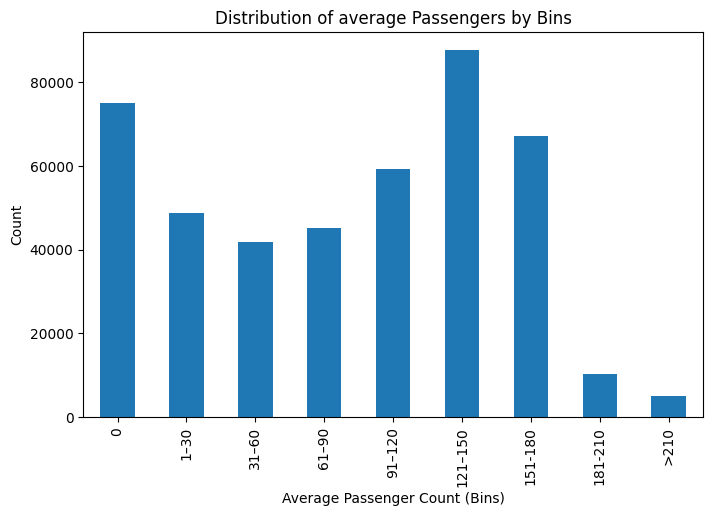

In [22]:
# Define bins and labels
bins = [-1, 0, 30, 60, 90, 120, 150, 180, 210, data["avg_passengers_per_flight"].max()]
labels = ["0", "1–30", "31–60", "61–90", "91–120", "121–150", "151-180", "181-210", ">210"]

# Assign average passengers to bins
data["avg_passengers_binned"] = pd.cut(data["avg_passengers_per_flight"], bins=bins, labels=labels)

# Count passengers in each bin
counts = data["avg_passengers_binned"].value_counts().sort_index()

# Visualize the distribution
counts.plot(kind="bar", figsize=(8,5))
plt.xlabel("Average Passenger Count (Bins)")
plt.ylabel("Count")
plt.title("Distribution of average Passengers by Bins")
plt.show()

In [23]:
data["route"] = data["origin"] + "-" + data["dest"]

In [24]:
data.head()

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest,dest_city_name,aircraft_type,aircraft_config,year,month,avg_passengers_per_flight,avg_seats_per_flight,avg_passengers_binned,route
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,...,MDW,"Chicago, IL",622,1,2024,10,<NA>,<NA>,NaN,ORD-MDW
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,WST,"Westerly, RI",79,1,2024,1,<NA>,<NA>,NaN,BID-WST
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,WST,"Westerly, RI",79,1,2024,7,<NA>,<NA>,NaN,BID-WST
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,WST,"Westerly, RI",79,1,2024,8,<NA>,<NA>,NaN,BID-WST
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,WST,"Westerly, RI",79,1,2024,12,<NA>,<NA>,NaN,BID-WST


In [25]:
data["route"].value_counts()[:10]

route
LAX-LAS    391
LAS-LAX    390
LAX-SFO    385
SFO-LAX    348
ANC-ORD    345
IAH-DFW    315
DFW-IAH    304
DEN-SLC    302
SLC-DEN    296
MSP-ORD    295
Name: count, dtype: int64

In [26]:
same_route_count = (data["origin"] == data["dest"]).sum()
print(same_route_count)

4148


In [27]:
data[data["origin"] == data["dest"]][:10]

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest,dest_city_name,aircraft_type,aircraft_config,year,month,avg_passengers_per_flight,avg_seats_per_flight,avg_passengers_binned,route
164,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,38.0,...,FAI,"Fairbanks, AK",416,2,2024,7,0,0,0,FAI-FAI
165,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,216.0,174.0,...,AFW,"Dallas/Fort Worth, TX",626,1,2024,3,0,0,0,AFW-AFW
363,0.0,1.0,600.0,3.0,0.0,0.0,0.0,0.0,4.0,3.0,...,FAI,"Fairbanks, AK",34,1,2024,8,0,3,0,FAI-FAI
364,0.0,1.0,600.0,3.0,0.0,0.0,0.0,0.0,60.0,58.0,...,BTT,"Bettles, AK",34,1,2024,8,0,3,0,BTT-BTT
380,0.0,1.0,600.0,3.0,2.0,0.0,0.0,0.0,72.0,68.0,...,OME,"Nome, AK",360,1,2024,2,2,3,1–30,OME-OME
388,0.0,1.0,750.0,3.0,0.0,0.0,0.0,0.0,50.0,48.0,...,MLY,"Manley Hot Springs, AK",34,1,2024,6,0,3,0,MLY-MLY
449,0.0,1.0,750.0,3.0,1.0,0.0,0.0,0.0,30.0,28.0,...,FAI,"Fairbanks, AK",34,1,2024,3,1,3,1–30,FAI-FAI
450,0.0,1.0,750.0,3.0,1.0,0.0,0.0,0.0,85.0,83.0,...,FAI,"Fairbanks, AK",34,1,2024,10,1,3,1–30,FAI-FAI
476,0.0,1.0,750.0,3.0,2.0,0.0,0.0,0.0,40.0,38.0,...,FAI,"Fairbanks, AK",34,1,2024,4,2,3,1–30,FAI-FAI
543,0.0,1.0,750.0,4.0,2.0,0.0,0.0,0.0,30.0,24.0,...,JNU,"Juneau, AK",35,4,2024,3,2,4,1–30,JNU-JNU


In [28]:
percent_same = 100 * same_route_count / len(data)
print(f"{same_route_count} rows ({percent_same:.2f} %) have origin = destination")

4148 rows (0.94 %) have origin = destination


In [29]:
#Remove rows where ORIGIN equals DESTINATION
#data = data[data["ORIGIN"] != data["DESTINATION"]]
#oder: data_clean = data[data["ORIGIN"] != data["DESTINATION"]].copy()


In [30]:
count_departures_0 = (data["departures_performed"] == 0).sum()
print("Rows with departures_performed = 0:", count_departures_0)

Rows with departures_performed = 0: 860


In [31]:
count_passengers_0 = (data["passengers"] == 0).sum()
print("Rows with passengers = 0:", count_passengers_0)


Rows with passengers = 0: 73832


In [32]:
#Remove rows where DEPARTURES_PERFORMED or PASSENGERS equal 0
#data = data[(data["DEPARTURES_PERFORMED"] != 0) & (data["PASSENGERS"] != 0)]
#oder: data_clean = data[(data["DEPARTURES_PERFORMED"] != 0) & (data["PASSENGERS"] != 0)].copy()

In [33]:
# Count the number of occurrences of each aircraft type
# For mapping to aircraft type name see file 'aircraft_type_mapping.csv'
# e.g. 614 = B737-800, 694 = A320-100/200, 673 = ERJ-175...
data["aircraft_type"].value_counts()[:10]

aircraft_type
614    50779
694    37766
673    30198
838    29329
612    25002
698    21360
699    19300
888    15138
721    14666
416    14095
Name: count, dtype: int64

In [34]:
mapping = pd.read_csv("../data/aircraft_type_mapping.csv")
data["aircraft_type"] = data["aircraft_type"].astype(str).str.strip()
mapping["Code"] = mapping["Code"].astype(str).str.strip()

In [35]:
# Merge
data = data.merge(
    mapping,
    left_on="aircraft_type",
    right_on="Code",
    how="left"
)

# New column 'aircraft_name' 
data["aircraft_name"] = data["Description"]

# Delete unnecessary columns
data = data.drop(columns=["Code", "Description"])

In [36]:
data.head()

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_city_name,aircraft_type,aircraft_config,year,month,avg_passengers_per_flight,avg_seats_per_flight,avg_passengers_binned,route,aircraft_name
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,...,"Chicago, IL",622,1,2024,10,<NA>,<NA>,NaN,ORD-MDW,Boeing 757-200
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,"Westerly, RI",79,1,2024,1,<NA>,<NA>,NaN,BID-WST,Piper PA-32 (Cherokee 6)
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,"Westerly, RI",79,1,2024,7,<NA>,<NA>,NaN,BID-WST,Piper PA-32 (Cherokee 6)
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,"Westerly, RI",79,1,2024,8,<NA>,<NA>,NaN,BID-WST,Piper PA-32 (Cherokee 6)
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,"Westerly, RI",79,1,2024,12,<NA>,<NA>,NaN,BID-WST,Piper PA-32 (Cherokee 6)


In [37]:
# Sum departures_performed for each aircraft_name and get the top 15
aircraft_departures = (
    data.groupby("aircraft_name")["departures_performed"].sum()
    .sort_values(ascending=False)
    .iloc[:15]
)


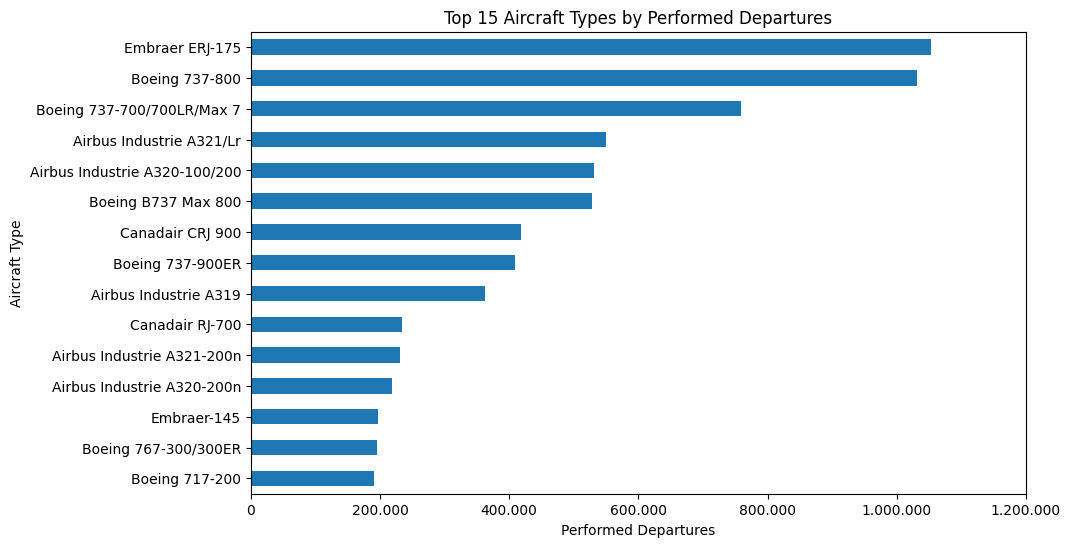

In [38]:
ax = aircraft_departures.plot(kind="barh", figsize=(10,6))
ax.ticklabel_format(style="plain", axis="x")
xticks = ax.get_xticks()
ax.set_xticks(xticks)
ax.set_xticklabels([f"{int(x):,}".replace(",", ".") for x in xticks])
plt.xlabel("Performed Departures")
plt.ylabel("Aircraft Type")
plt.title("Top 15 Aircraft Types by Performed Departures")
plt.gca().invert_yaxis()
plt.show()



In [39]:
aircraft_passengers = (
    data.groupby("aircraft_name")["passengers"].sum()
    .sort_values(ascending=False)
    .iloc[:15]
)

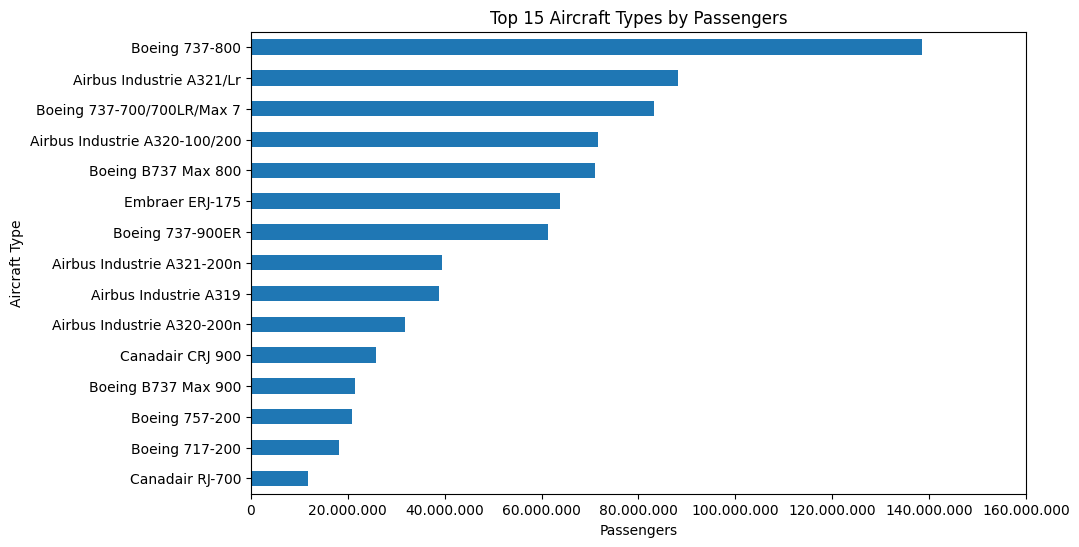

In [40]:
ax = aircraft_passengers.plot(kind="barh", figsize=(10,6))
ax.ticklabel_format(style="plain", axis="x")
xticks = ax.get_xticks()
ax.set_xticks(xticks)
ax.set_xticklabels([f"{int(x):,}".replace(",", ".") for x in xticks])

plt.xlabel("Passengers")
plt.ylabel("Aircraft Type")
plt.title("Top 15 Aircraft Types by Passengers")
plt.gca().invert_yaxis()
plt.show()

In [41]:
route_passengers = (
    data.groupby("route")["passengers"].sum()
    .sort_values(ascending=False)
    .iloc[:15]   
)

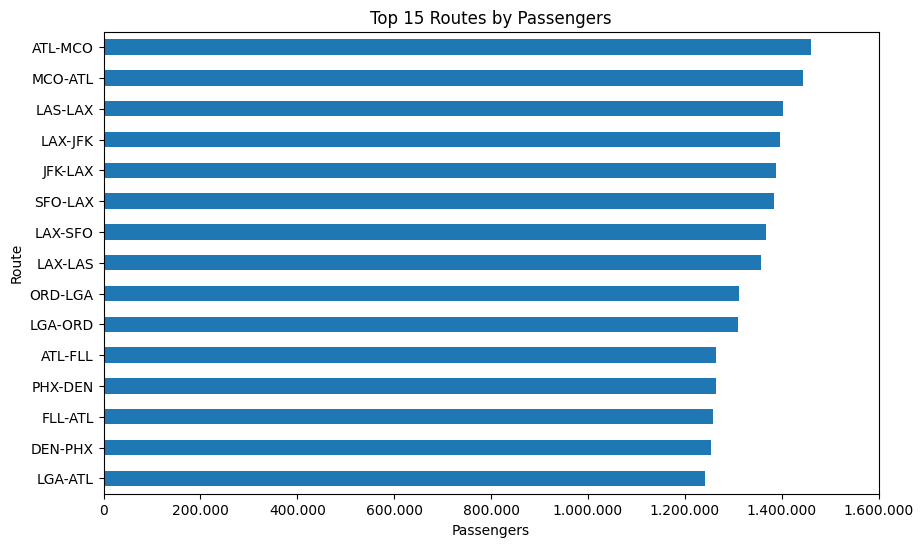

In [42]:
ax = route_passengers.plot(kind="barh", figsize=(10,6))
ax.ticklabel_format(style="plain", axis="x")
xticks = ax.get_xticks()
ax.set_xticks(xticks)
ax.set_xticklabels([f"{int(x):,}".replace(",", ".") for x in xticks])
plt.xlabel("Passengers")
plt.ylabel("Route")
plt.title("Top 15 Routes by Passengers")
plt.gca().invert_yaxis()
plt.show()

In [43]:
route_avg_pax = (
    data.groupby("route")["avg_passengers_per_flight"]
    .mean()
    .sort_values(ascending=False)
    .iloc[:15]                    
)

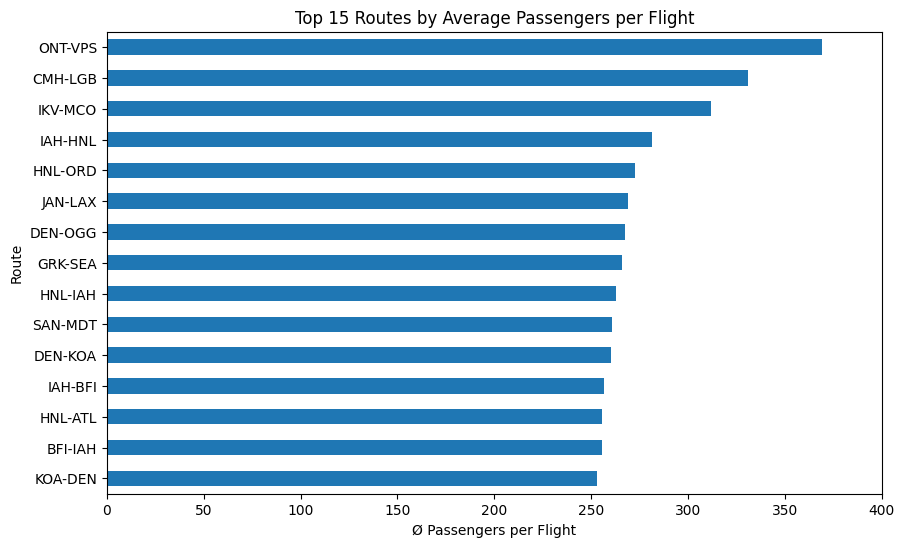

In [44]:
ax = route_avg_pax.plot(kind="barh", figsize=(10,6))
ax.ticklabel_format(style="plain", axis="x") 
xticks = ax.get_xticks()
ax.set_xticks(xticks)
ax.set_xticklabels([f"{x:,.0f}".replace(",", ".") for x in xticks])
plt.xlabel("Ø Passengers per Flight")
plt.ylabel("Route")
plt.title("Top 15 Routes by Average Passengers per Flight")
plt.gca().invert_yaxis()
plt.show()

<Figure size 1200x600 with 0 Axes>

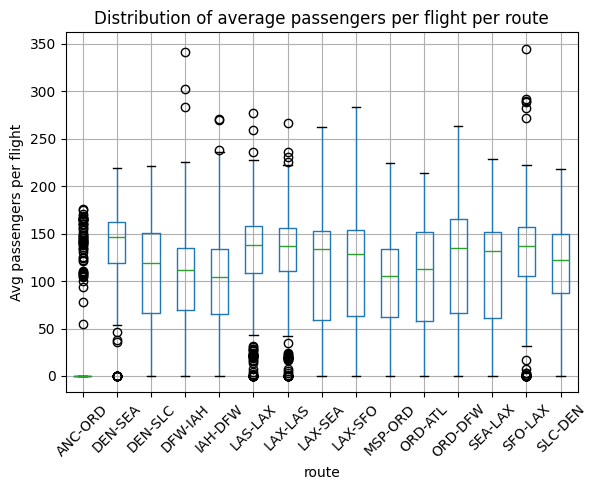

In [45]:
# Route count
top15_routes = data["route"].value_counts().head(15).index
subset = data[data["route"].isin(top15_routes)]

plt.figure(figsize=(12,6))
subset.boxplot(column="avg_passengers_per_flight", by="route", rot=45)
plt.ylabel("Avg passengers per flight")
plt.title("Distribution of average passengers per flight per route")
plt.suptitle("")
plt.show()

<Figure size 1200x600 with 0 Axes>

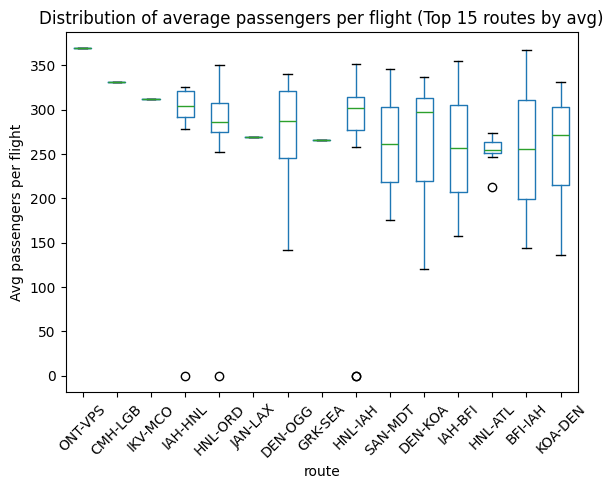

In [46]:
# Avg. passenger count
route_avg = (
    data.groupby("route")["avg_passengers_per_flight"]
    .mean()
    .sort_values(ascending=False)
)
top15_routes = route_avg.head(15).index
subset = data[data["route"].isin(top15_routes)].copy()
subset["route"] = pd.Categorical(subset["route"], categories=list(top15_routes), ordered=True)
plt.figure(figsize=(12,6))
subset.boxplot(column="avg_passengers_per_flight", by="route", rot=45, grid=False)
plt.ylabel("Avg passengers per flight")
plt.title("Distribution of average passengers per flight (Top 15 routes by avg)")
plt.suptitle("")
plt.show()



##### Pax load = better indicator as aircraft types have a wide range of seat capacities

In [47]:
# Add pax_load_factor
data["pax_load_factor"] = (
    (data["passengers"] / data["seats"].replace(0, np.nan))
    .round(2)
)

In [48]:
data.tail(10)

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,aircraft_type,aircraft_config,year,month,avg_passengers_per_flight,avg_seats_per_flight,avg_passengers_binned,route,aircraft_name,pax_load_factor
440741,777.0,777.0,932400.0,4135.0,2545.0,11093.0,0.0,11.0,10302.0,7971.0,...,79,1,2024,6,3,5,1–30,SPN-TIQ,Piper PA-32 (Cherokee 6),0.62
440742,801.0,801.0,961200.0,4254.0,2599.0,16924.0,0.0,11.0,10938.0,8535.0,...,79,1,2024,5,3,5,1–30,SPN-TIQ,Piper PA-32 (Cherokee 6),0.61
440743,889.0,886.0,2360400.0,7992.0,5182.0,10195.0,0.0,59.0,33406.0,24906.0,...,416,1,2024,6,6,9,1–30,ANC-ENA,Cessna 208 Caravan,0.65
440744,891.0,889.0,2367000.0,8002.0,4689.0,5250.0,0.0,59.0,33895.0,26497.0,...,416,1,2024,6,5,9,1–30,ENA-ANC,Cessna 208 Caravan,0.59
440745,987.0,986.0,2900400.0,8874.0,7626.0,6509.0,0.0,59.0,38376.0,29634.0,...,416,1,2024,8,8,9,1–30,ENA-ANC,Cessna 208 Caravan,0.86
440746,989.0,987.0,2902800.0,8892.0,5602.0,8038.0,0.0,59.0,38105.0,28285.0,...,416,1,2024,8,6,9,1–30,ANC-ENA,Cessna 208 Caravan,0.63
440747,995.0,994.0,2737200.0,8946.0,7247.0,10718.0,0.0,59.0,37921.0,27463.0,...,416,1,2024,7,7,9,1–30,ANC-ENA,Cessna 208 Caravan,0.81
440748,999.0,998.0,2748200.0,8991.0,6631.0,5663.0,0.0,59.0,39218.0,30137.0,...,416,1,2024,7,7,9,1–30,ENA-ANC,Cessna 208 Caravan,0.74
440749,1522.0,1522.0,1826400.0,8026.0,5084.0,10340.0,0.0,11.0,17768.0,13202.0,...,79,1,2024,7,3,5,1–30,TIQ-SPN,Piper PA-32 (Cherokee 6),0.63
440750,1574.0,1574.0,1888800.0,8284.0,5104.0,29100.0,0.0,11.0,20390.0,15668.0,...,79,1,2024,7,3,5,1–30,SPN-TIQ,Piper PA-32 (Cherokee 6),0.62


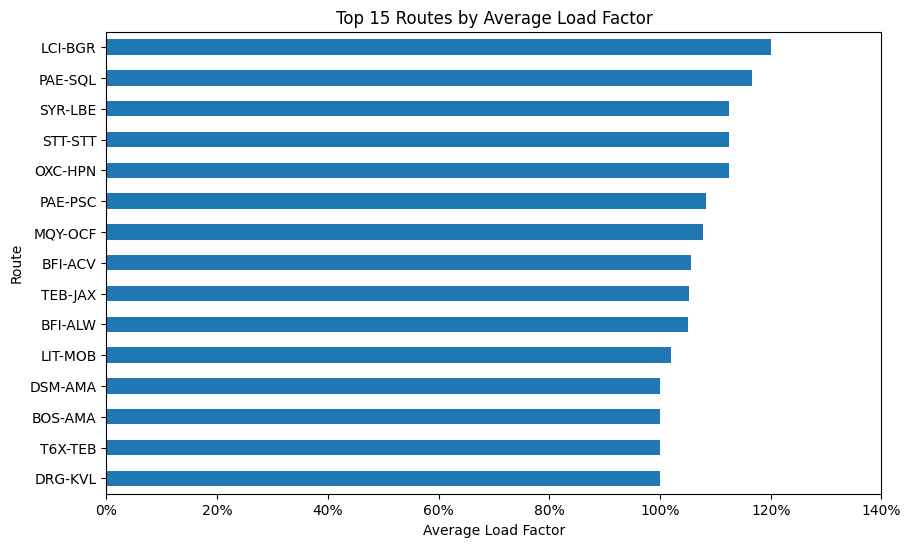

In [49]:
route_load_factor = (
    data.groupby("route")[["passengers", "seats"]]
    .sum()
    .assign(pax_load_factor=lambda d: d["passengers"] / d["seats"])
    .sort_values("pax_load_factor", ascending=False)
    .head(15)
)
ax = route_load_factor["pax_load_factor"].plot(kind="barh", figsize=(10,6))
plt.ylabel("Route")
plt.xlabel("Average Load Factor")
plt.title("Top 15 Routes by Average Load Factor")
plt.gca().invert_yaxis()
xticks = ax.get_xticks()
ax.set_xticks(xticks)
ax.set_xticklabels([f"{x:.0%}" for x in xticks])

plt.show()

<Figure size 1200x600 with 0 Axes>

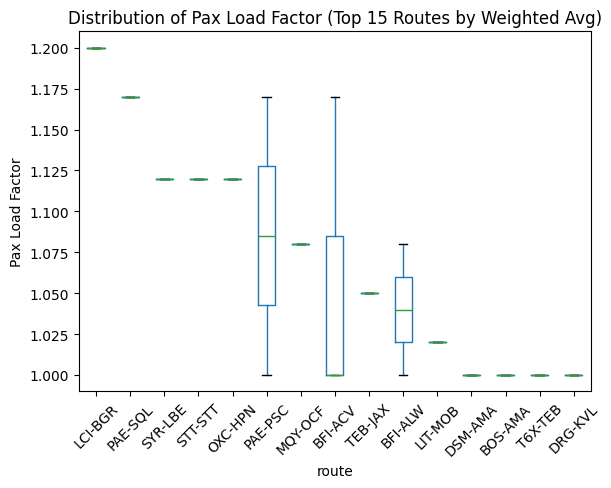

In [50]:
# Pax Load Factor
top15_routes_load_factor = route_load_factor.head(15).index
subset = data[data["route"].isin(top15_routes_load_factor)].copy()
subset["route"] = pd.Categorical(subset["route"], categories=list(top15_routes_load_factor), ordered=True)

plt.figure(figsize=(12,6))
subset.boxplot(column="pax_load_factor", by="route", rot=45, grid=False)
plt.ylabel("Pax Load Factor")
plt.title("Distribution of Pax Load Factor (Top 15 Routes by Weighted Avg)")
plt.suptitle("")
plt.show()



In [51]:
# Cases with Load Factor > 1 
overs = data[data["pax_load_factor"] > 1]
print(overs[["route", "passengers", "seats", "pax_load_factor"]].head(20))

         route  passengers  seats  pax_load_factor
1137   LCI-BGR         6.0    5.0             1.20
1138   LCI-BGR         6.0    5.0             1.20
4243   VNY-PGA         8.0    7.0             1.14
4868   STX-STX         9.0    8.0             1.12
4869   SJC-VNY         9.0    8.0             1.12
7982   PAE-PSC         7.0    6.0             1.17
7983   BFI-SUO         7.0    6.0             1.17
7984   ACV-BFI         7.0    6.0             1.17
7985   BFI-ACV         7.0    6.0             1.17
7986   PAE-SQL         7.0    6.0             1.17
8372   ARC-VEE        10.0    9.0             1.11
15770  HPN-TEB         9.0    8.0             1.12
15771  MVY-ACK         9.0    8.0             1.12
15772  OXC-HPN         9.0    8.0             1.12
15773  BED-ACK         9.0    8.0             1.12
15774  ACK-BED         9.0    8.0             1.12
15775  BDR-ACK         9.0    8.0             1.12
15776  ACK-BDR         9.0    8.0             1.12
15777  MVY-LGA         9.0    8

In [52]:
count_over = (data["pax_load_factor"] > 1.0).sum()
percent_over = 100 * count_over / len(data)

print(f"Count: {count_over}")
print(f"Share: {percent_over:.2f}%")

Count: 62
Share: 0.01%


In [53]:
# Remove rows where pax_load_factor > 1.0?

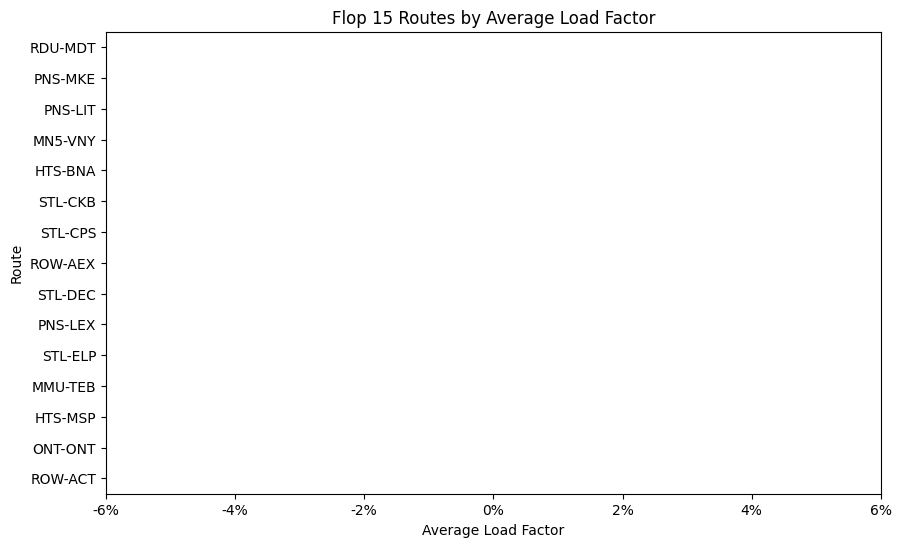

In [54]:
flop15_route_load_factor = (
    data.groupby("route")[["passengers", "seats"]]
    .sum()
    .assign(pax_load_factor=lambda d: d["passengers"] / d["seats"])
    .sort_values("pax_load_factor", ascending=True)
    .head(15)
)
ax = flop15_route_load_factor["pax_load_factor"].plot(kind="barh", figsize=(10,6))
plt.ylabel("Route")
plt.xlabel("Average Load Factor")
plt.title("Flop 15 Routes by Average Load Factor")
plt.gca().invert_yaxis()
xticks = ax.get_xticks()
ax.set_xticks(xticks)
ax.set_xticklabels([f"{x:.0%}" for x in xticks])

plt.show()

In [55]:
print(flop15_route_load_factor.head(20))

         passengers   seats  pax_load_factor
route                                       
RDU-MDT         0.0   189.0              0.0
PNS-MKE         0.0    50.0              0.0
PNS-LIT         0.0    50.0              0.0
MN5-VNY         0.0     9.0              0.0
HTS-BNA         0.0   186.0              0.0
STL-CKB         0.0    30.0              0.0
STL-CPS         0.0    72.0              0.0
ROW-AEX         0.0    65.0              0.0
STL-DEC         0.0    50.0              0.0
PNS-LEX         0.0    76.0              0.0
STL-ELP         0.0    76.0              0.0
MMU-TEB         0.0    83.0              0.0
HTS-MSP         0.0   558.0              0.0
ONT-ONT         0.0  1839.0              0.0
ROW-ACT         0.0    65.0              0.0


In [ ]:
# remove those rows where pax = 0.0 // load_factor <= 0?
# remove chart above, use following

In [57]:
print("NaN-Werte:", flop15_route_load_factor["pax_load_factor"].isna().sum())
print("Min:", flop15_route_load_factor["pax_load_factor"].min())
print("Max:", flop15_route_load_factor["pax_load_factor"].max())
print("Durchschnitt:", flop15_route_load_factor["pax_load_factor"].mean())


NaN-Werte: 0
Min: 0.0
Max: 0.0
Durchschnitt: 0.0


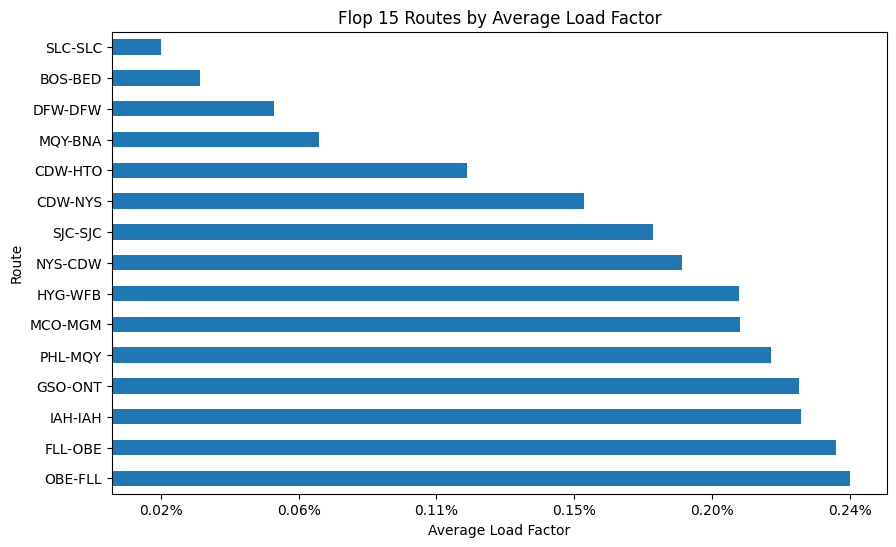

In [58]:
flop15_route_load_factor = (
    data.groupby("route")[["passengers", "seats"]]
    .sum()
    .assign(pax_load_factor=lambda d: d["passengers"] / d["seats"])
    .query("pax_load_factor > 0")
    .sort_values("pax_load_factor", ascending=True)
    .head(15)
)
ax = flop15_route_load_factor["pax_load_factor"].plot(kind="barh", figsize=(10,6))
plt.ylabel("Route")
plt.xlabel("Average Load Factor")
plt.title("Flop 15 Routes by Average Load Factor")
plt.gca().invert_yaxis()
xmin, xmax = flop15_route_load_factor["pax_load_factor"].min(), flop15_route_load_factor["pax_load_factor"].max()
xticks = np.linspace(xmin, xmax, 6)
ax.set_xticks(xticks)
ax.set_xticklabels([f"{x:.2%}" for x in xticks])

plt.show()

In [63]:
data["aircraft_name"].value_counts()[:20]

aircraft_name
Boeing 737-800                        50779
Airbus Industrie A320-100/200         37766
Embraer ERJ-175                       30198
Boeing B737 Max 800                   29329
Boeing 737-700/700LR/Max 7            25002
Airbus Industrie A319                 21360
Airbus Industrie A321/Lr              19300
Boeing 737-900ER                      15138
Airbus Industrie A321-200n            14666
Cessna 208 Caravan                    14095
Boeing 757-200                        13119
Airbus Industrie A320-200n            12511
Canadair CRJ 900                      11921
Cessna C206/207/209/210 Stationair    11520
Boeing 767-300/300ER                  11267
Canadair RJ-700                       10798
Boeing B737 Max 900                    9168
Pilatus PC-12                          6545
A220-300 BD-500-1A11                   6426
Canadair RJ-200ER /RJ-440              5841
Name: count, dtype: int64

In [65]:
# No seats
count_zero_seats= (data["seats"] == 0).sum()
print("Number of flights with 0 seats:", count_zero_seats)

# Share
share_zero_seats = 100 * count_zero_seats / len(data)
print(f"Share: {share_zero_seats:.2f}%")

Number of flights with 0 seats: 45129
Share: 10.24%


In [66]:
# Less than 30 seats (>0)
count_small = ((data["seats"] > 0) & (data["seats"] < 30)).sum()
print("Number of flights with 1–29 seats:", count_small)

# Share
share_small = 100 * count_small / len(data)
print(f"Share: {share_small:.2f}%")

Number of flights with 1–29 seats: 38389
Share: 8.71%


In [69]:
small_aircraft = data[(data["seats"] > 0) & (data["seats"] < 30)]

print(small_aircraft["aircraft_name"].unique())

['Pilatus PC-12' 'Embraer Praetor 600' 'Cessna 172 Skyhawk'
 'Cessna 208 Caravan' 'Helio H-250/295/395' 'Robinson R44'
 'Dassault Falcon 7X' 'Bombardier Global 7500 BD-7500'
 'Cessna C206/207/209/210 Stationair' 'Cessna 180'
 'Cessna 510 Mustang/560XL Citation Excel' 'Beech Baron (55 Series)'
 'Piper PA-31 (Navajo)/T-1020' 'Embraer Legacy 500'
 'Piper PA-32 (Cherokee 6)' 'Cessna Citation II/ Bravo'
 'Bombardier Global 6000/Global Xrs' 'Bombardier Global 5000'
 'Hughes-500/530' 'Sikorsky S-76' 'De Havilland DHC2 Beaver'
 'Cessna Citationjet/CJ1/CJ2/CJ3' 'Land-Turbine'
 'Gulfstream III/V/ G-V Exec/ G-5/550'
 'Bombardier BD-100-1A10 Challenger 300' 'Bomardier Challenger 350'
 'Bombardier Challenger 604/605' 'Cessna 185A/B/C Skywagon'
 'Gipps Aero Ga8 Airvan' 'Raytheon Beechcraft Hawker 400XP'
 'Cessna Citation X Model 650/550B/550XL'
 'Cessna CE-680 Citation Sovereign' 'Dassault Falcon 2000EX/2000lxs'
 'Cessna C-402/402A/402B' 'Gulfstream Aerospace G500'
 'Bell 212 Twin Two Twelve' 'Gulfs

In [82]:
print(data["aircraft_name"].unique())

['Boeing 757-200' 'Piper PA-32 (Cherokee 6)' 'Cessna C-402/402A/402B'
 'Boeing 717-200' 'Airbus Industrie A350-900' 'Boeing 767-300/300ER'
 'Boeing 757-300' 'Airbus Industrie A321/Lr' 'Boeing 737-800'
 'Airbus Industrie A330-300/333' 'A200-100 BD-500-1A10'
 'Airbus Industrie A330-900' 'Airbus Industrie A319' 'Boeing 737-900ER'
 'Cessna 208 Caravan' 'Dassault Falcon 8x' 'Dassault Falcon 7X'
 'Embraer Legacy 650' 'Embraer 190' 'Bombardier BD-700 Global Express'
 'Airbus Industrie A330-200' 'Bombardier Global 7500 BD-7500'
 'Dassault Falcon 2000EX/2000lxs' 'Bombardier Challenger 604/605'
 'Gulfstream III/V/ G-V Exec/ G-5/550' 'Bomardier Challenger 350'
 'Cessna Citation II/ Bravo' 'Helio H-250/295/395' 'Gulfstream I'
 'Boeing 737-700/700LR/Max 7' 'Gulfstream G650' 'Gulfstream G150'
 'Bombardier Global 5000' 'Cessna 510 Mustang/560XL Citation Excel'
 'Bombardier Global 6000/Global Xrs'
 'Pilatus Britten-Norman BN2/A Islander' 'Shorts 360' 'Boeing 747-400F'
 'Pilatus PC-12' 'Embraer Praetor

In [73]:
# Check bigger aircrafts in list
suspect_types = [
    "Airbus Industrie A319",
    "Airbus Industrie A320-100/200",
    "A200-100 BD-500-1A10",
    "Boeing 737-400",
    "Boeing 737-700/700LR/Max 7",
    "Boeing 737-800",
    "Boeing 747-400"
]

# Filter rows with suspect aircraft types
suspect = small_aircraft[
    small_aircraft["aircraft_name"].isin(suspect_types)
][["year","month","origin","dest","departures_performed","aircraft_name","seats","avg_seats_per_flight","passengers","departures_performed"]]

# Sample
print(suspect.sample(10))

       year  month origin dest  departures_performed   aircraft_name  seats  \
82573  2024      1    CVG  MKE                  11.0  Boeing 737-400    2.0   
85750  2024      1    LRD  SAN                  21.0  Boeing 737-800    2.0   
89951  2024     10    ORD  ANC                  50.0  Boeing 747-400    8.0   
84722  2024     10    LAX  HNL                  17.0  Boeing 747-400    8.0   
85431  2024      2    PHL  CVG                  20.0  Boeing 737-800    1.0   
90382  2024      5    ORD  ANC                  63.0  Boeing 747-400   16.0   
90273  2024      6    ORD  ANC                  59.0  Boeing 747-400   16.0   
86458  2024      2    PHX  LAX                  24.0  Boeing 737-800    2.0   
66334  2024      2    RIC  ROC                   2.0  Boeing 737-800    1.0   
74233  2024     11    HNL  GUM                   3.0  Boeing 747-400    8.0   

       avg_seats_per_flight  passengers  departures_performed  
82573                     0         2.0                  11.0  
85

In [74]:
config_mapping = pd.read_csv("../data/config_mapping.csv")
data["aircraft_config"] = data["aircraft_config"].astype(str).str.strip()
config_mapping["Code"] = config_mapping["Code"].astype(str).str.strip()

# Merge
data = data.merge(
    config_mapping, left_on="aircraft_config", right_on="Code", how="left"
)

# New column 'configuration_desc'
data["configuration_desc"] = data["Description"]

# Delete unnecessary columns
data = data.drop(columns=["Code", "Description"])

In [75]:
data.head()

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,aircraft_config,year,month,avg_passengers_per_flight,avg_seats_per_flight,avg_passengers_binned,route,aircraft_name,pax_load_factor,configuration_desc
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,...,1,2024,10,<NA>,<NA>,NaN,ORD-MDW,Boeing 757-200,NaN,Passenger Configuration
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,1,2024,1,<NA>,<NA>,NaN,BID-WST,Piper PA-32 (Cherokee 6),NaN,Passenger Configuration
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,1,2024,7,<NA>,<NA>,NaN,BID-WST,Piper PA-32 (Cherokee 6),NaN,Passenger Configuration
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,1,2024,8,<NA>,<NA>,NaN,BID-WST,Piper PA-32 (Cherokee 6),NaN,Passenger Configuration
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,1,2024,12,<NA>,<NA>,NaN,BID-WST,Piper PA-32 (Cherokee 6),NaN,Passenger Configuration


In [81]:

# Filter small aircraft again
small_aircraft = data[(data["seats"] > 0) & (data["seats"] < 30)]

# Check bigger aircrafts
suspect_types = [
    "Airbus Industrie A319",
    "Airbus Industrie A320-100/200",
    "A200-100 BD-500-1A10",
    "Boeing 737-400",
    "Boeing 737-700/700LR/Max 7",
    "Boeing 737-800",
    "Boeing 747-400"
]

# Filter rows with suspect aircraft types
suspect = small_aircraft[
    small_aircraft["aircraft_name"].isin(suspect_types)
][["year","month","origin","dest","departures_performed","aircraft_name","configuration_desc","seats","avg_seats_per_flight","passengers","departures_performed"]]

# Sample
suspect.sample(15)

,year,month,origin,dest,departures_performed,aircraft_name,configuration_desc,seats,avg_seats_per_flight,passengers,departures_performed
24208,2024,9,LAS,PBI,1.0,Airbus Industrie A319,Passenger Configuration,19.0,19,0.0,1.0
59546,2024,10,WRI,ANC,1.0,Boeing 747-400,Freight Configuration,8.0,8,0.0,1.0
85892,2024,10,ANC,DFW,21.0,Boeing 747-400,Freight Configuration,24.0,1,0.0,21.0
85283,2024,5,ANC,DFW,19.0,Boeing 747-400,Freight Configuration,8.0,0,0.0,19.0
74266,2024,10,HSV,MIA,3.0,Boeing 747-400,Freight Configuration,8.0,3,0.0,3.0
89951,2024,10,ORD,ANC,50.0,Boeing 747-400,Freight Configuration,8.0,0,0.0,50.0
59545,2024,12,SDF,CVG,1.0,Boeing 747-400,Freight Configuration,8.0,8,0.0,1.0
88865,2024,9,ANC,LAX,32.0,Boeing 747-400,Freight Configuration,8.0,0,0.0,32.0
84649,2024,3,PHX,RNO,17.0,Boeing 737-800,Freight Configuration,4.0,0,4.0,17.0
29453,2024,1,CVG,HRL,1.0,Boeing 737-400,Freight Configuration,3.0,3,3.0,1.0


In [ ]:
# filter freight config raus?
# set min seats und filter 747-400 mit 4 seats?

In [ ]:
# Only relevant configs 
pax_config_data = data[data["configuration_desc"].isin([
    "Aircraft Configuration Not Relevant",
    "Passenger Configuration"
])]

In [91]:
pax_config_data.head()

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,aircraft_config,year,month,avg_passengers_per_flight,avg_seats_per_flight,avg_passengers_binned,route,aircraft_name,pax_load_factor,configuration_desc
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,...,1,2024,10,<NA>,<NA>,NaN,ORD-MDW,Boeing 757-200,NaN,Passenger Configuration
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,1,2024,1,<NA>,<NA>,NaN,BID-WST,Piper PA-32 (Cherokee 6),NaN,Passenger Configuration
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,1,2024,7,<NA>,<NA>,NaN,BID-WST,Piper PA-32 (Cherokee 6),NaN,Passenger Configuration
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,1,2024,8,<NA>,<NA>,NaN,BID-WST,Piper PA-32 (Cherokee 6),NaN,Passenger Configuration
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,1,2024,12,<NA>,<NA>,NaN,BID-WST,Piper PA-32 (Cherokee 6),NaN,Passenger Configuration


Remove performed flights = 0

In [92]:
pax_config_data = pax_config_data[pax_config_data["departures_performed"] > 0].copy()

In [93]:
pax_config_data.head()

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,aircraft_config,year,month,avg_passengers_per_flight,avg_seats_per_flight,avg_passengers_binned,route,aircraft_name,pax_load_factor,configuration_desc
165,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,216.0,174.0,...,1,2024,3,0,0,0,AFW-AFW,Boeing 767-300/300ER,NaN,Passenger Configuration
166,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,...,1,2024,8,0,0,0,MIA-OPF,Dassault Falcon 8x,NaN,Passenger Configuration
167,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,...,1,2024,11,0,0,0,ORD-PWK,Dassault Falcon 7X,NaN,Passenger Configuration
168,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,...,1,2024,4,0,0,0,LGA-TEB,Dassault Falcon 8x,NaN,Passenger Configuration
169,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,...,1,2024,12,0,0,0,SFO-OAK,Airbus Industrie A319,NaN,Passenger Configuration


Remove ferry flights or flights with missing pax data

In [94]:
pax_config_data = pax_config_data[pax_config_data["passengers"] > 0].copy()

In [96]:
pax_config_data.head(15)

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,aircraft_config,year,month,avg_passengers_per_flight,avg_seats_per_flight,avg_passengers_binned,route,aircraft_name,pax_load_factor,configuration_desc
343,0.0,1.0,440.0,11.0,2.0,0.0,0.0,337.0,0.0,0.0,...,1,2024,5,2,11,1–30,LAX-SFO,Embraer Praetor 600,0.18,Passenger Configuration
350,0.0,1.0,500.0,2.0,1.0,0.0,0.0,7.0,18.0,10.0,...,1,2024,6,1,2,1–30,TYE-BVU,Cessna 172 Skyhawk,0.50,Passenger Configuration
351,0.0,1.0,500.0,2.0,1.0,0.0,0.0,40.0,28.0,20.0,...,1,2024,7,1,2,1–30,MRI-BVU,Cessna 172 Skyhawk,0.50,Passenger Configuration
352,0.0,1.0,500.0,2.0,1.0,0.0,0.0,40.0,28.0,20.0,...,1,2024,4,1,2,1–30,BVU-MRI,Cessna 172 Skyhawk,0.50,Passenger Configuration
353,0.0,1.0,500.0,2.0,1.0,0.0,0.0,40.0,29.0,21.0,...,1,2024,10,1,2,1–30,BVU-MRI,Cessna 172 Skyhawk,0.50,Passenger Configuration
355,0.0,1.0,500.0,2.0,1.0,50.0,0.0,40.0,28.0,20.0,...,1,2024,6,1,2,1–30,BVU-MRI,Cessna 172 Skyhawk,0.50,Passenger Configuration
356,0.0,1.0,500.0,2.0,1.0,50.0,0.0,44.0,33.0,25.0,...,1,2024,6,1,2,1–30,TYE-MRI,Cessna 172 Skyhawk,0.50,Passenger Configuration
357,0.0,1.0,500.0,2.0,1.0,80.0,0.0,44.0,33.0,25.0,...,1,2024,12,1,2,1–30,TYE-MRI,Cessna 172 Skyhawk,0.50,Passenger Configuration
358,0.0,1.0,500.0,2.0,1.0,90.0,0.0,40.0,29.0,21.0,...,1,2024,10,1,2,1–30,MRI-BVU,Cessna 172 Skyhawk,0.50,Passenger Configuration
379,0.0,1.0,600.0,3.0,1.0,0.0,0.0,181.0,90.0,88.0,...,1,2024,8,1,3,1–30,CXF-FAI,Helio H-250/295/395,0.33,Passenger Configuration


In [97]:
pax_config_data.tail(15)

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,aircraft_config,year,month,avg_passengers_per_flight,avg_seats_per_flight,avg_passengers_binned,route,aircraft_name,pax_load_factor,configuration_desc
440736,727.0,727.0,2026200.0,6507.0,5163.0,6881.0,0.0,59.0,26961.0,20282.0,...,1,2024,10,7,9,1–30,ENA-ANC,Cessna 208 Caravan,0.79,Passenger Configuration
440737,741.0,741.0,889200.0,3880.0,2349.0,5911.0,0.0,11.0,9073.0,6850.0,...,1,2024,8,3,5,1–30,TIQ-SPN,Piper PA-32 (Cherokee 6),0.61,Passenger Configuration
440738,746.0,746.0,895200.0,3973.0,2517.0,4542.0,0.0,11.0,9092.0,6854.0,...,1,2024,6,3,5,1–30,TIQ-SPN,Piper PA-32 (Cherokee 6),0.63,Passenger Configuration
440739,754.0,754.0,904800.0,3949.0,2353.0,13399.0,0.0,11.0,10358.0,8096.0,...,1,2024,8,3,5,1–30,SPN-TIQ,Piper PA-32 (Cherokee 6),0.60,Passenger Configuration
440740,775.0,775.0,930000.0,4115.0,2587.0,7330.0,0.0,11.0,9317.0,6992.0,...,1,2024,5,3,5,1–30,TIQ-SPN,Piper PA-32 (Cherokee 6),0.63,Passenger Configuration
440741,777.0,777.0,932400.0,4135.0,2545.0,11093.0,0.0,11.0,10302.0,7971.0,...,1,2024,6,3,5,1–30,SPN-TIQ,Piper PA-32 (Cherokee 6),0.62,Passenger Configuration
440742,801.0,801.0,961200.0,4254.0,2599.0,16924.0,0.0,11.0,10938.0,8535.0,...,1,2024,5,3,5,1–30,SPN-TIQ,Piper PA-32 (Cherokee 6),0.61,Passenger Configuration
440743,889.0,886.0,2360400.0,7992.0,5182.0,10195.0,0.0,59.0,33406.0,24906.0,...,1,2024,6,6,9,1–30,ANC-ENA,Cessna 208 Caravan,0.65,Passenger Configuration
440744,891.0,889.0,2367000.0,8002.0,4689.0,5250.0,0.0,59.0,33895.0,26497.0,...,1,2024,6,5,9,1–30,ENA-ANC,Cessna 208 Caravan,0.59,Passenger Configuration
440745,987.0,986.0,2900400.0,8874.0,7626.0,6509.0,0.0,59.0,38376.0,29634.0,...,1,2024,8,8,9,1–30,ENA-ANC,Cessna 208 Caravan,0.86,Passenger Configuration


In [98]:
small_pax_aircraft = pax_config_data[(pax_config_data["seats"] > 0) & (pax_config_data["seats"] < 30)]

print(small_pax_aircraft["aircraft_name"].unique())

['Embraer Praetor 600' 'Cessna 172 Skyhawk' 'Helio H-250/295/395'
 'Robinson R44' 'Dassault Falcon 7X' 'Bombardier Global 7500 BD-7500'
 'Cessna 180' 'Cessna C206/207/209/210 Stationair'
 'Cessna 510 Mustang/560XL Citation Excel' 'Cessna 208 Caravan'
 'Piper PA-31 (Navajo)/T-1020' 'Embraer Legacy 500'
 'Cessna Citation II/ Bravo' 'Bombardier Global 6000/Global Xrs'
 'Bombardier Global 5000' 'Hughes-500/530' 'Piper PA-32 (Cherokee 6)'
 'Sikorsky S-76' 'Cessna Citationjet/CJ1/CJ2/CJ3' 'Land-Turbine'
 'Pilatus PC-12' 'Bombardier BD-100-1A10 Challenger 300'
 'Bomardier Challenger 350' 'Bombardier Challenger 604/605'
 'Gipps Aero Ga8 Airvan' 'Cessna Citation X Model 650/550B/550XL'
 'Raytheon Beechcraft Hawker 400XP' 'Cessna CE-680 Citation Sovereign'
 'Dassault Falcon 2000EX/2000lxs' 'Gulfstream Aerospace G500'
 'De Havilland DHC2 Beaver' 'Gulfstream G200'
 'Canadair (Bombardier) Challlenger 601'
 'Raytheon Beechcraft Hawker 800XP' 'Gulfstream G450'
 'Gulfstream Aerospace Gulfstream G280' 

No good official list to map min_seats -> Stichproben-Analyse

In [105]:
# Check some bigger aircrafts in list
suspects = ["Airbus Industrie A319", "Boeing 737-700/700LR/Max 7", "Embraer 190", "'A200-100 BD-500-1A10", "Boeing B737 Max 800'"]

# Rows with <30 Sitzen 
suspect_rows = pax_config_data[
    (pax_config_data["seats"] < 30) & 
    (pax_config_data["aircraft_name"].isin(suspects))
][["year", "month", "origin", "dest", "aircraft_name", "seats", "unique_carrier_name","passengers", "departures_performed"]]

suspect_rows.head(20)

,year,month,origin,dest,aircraft_name,seats,unique_carrier_name,passengers,departures_performed
22052,2024,3,AZA,BWI,Embraer 190,19.0,Air Hamburg Luftverkehrsgesellschaft mbH,6.0,1.0
22053,2024,3,EWR,VNY,Embraer 190,19.0,Air Hamburg Luftverkehrsgesellschaft mbH,7.0,1.0
22054,2024,6,BGR,VNY,Embraer 190,19.0,Air Hamburg Luftverkehrsgesellschaft mbH,10.0,1.0
24210,2024,9,DAL,LEX,Airbus Industrie A319,19.0,Acropolis Aviation Ltd.,5.0,1.0
46934,2024,12,FLL,MSY,Boeing 737-700/700LR/Max 7,19.0,"Global Jet Luxembourg, Sa",2.0,1.0


In [106]:
# Share of suspect rows
share = 100 * len(suspect_rows) / len(pax_config_data)

print(f"Share: {share:.4f}%")

Share: 0.0014%


In [ ]:
# Remove smaller aircraft with < 30 seats (not relevant for business case) and bigger aircrafts < 30 seats -> might be data errors

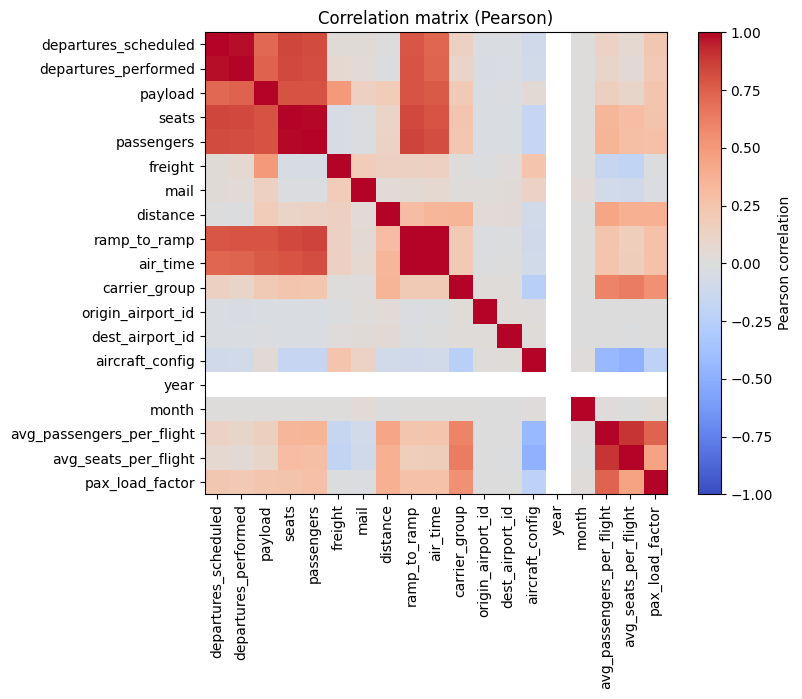

In [60]:
pearson = data.select_dtypes('number').corr(method='pearson')
plt.figure(figsize=(8,6))
plt.imshow(pearson, cmap="coolwarm", vmin=-1, vmax=1)
plt.colorbar(label="Pearson correlation")
plt.xticks(range(len(pearson.columns)), pearson.columns, rotation=90)
plt.yticks(range(len(pearson.index)), pearson.index)
plt.title("Correlation matrix (Pearson)")
plt.show()



In [61]:
# Top 10 Correlations
mask = ~np.eye(len(pearson), dtype=bool)
pearson_long = (
    pearson.where(mask)
           .stack()
           .reset_index()
)
pearson_long.columns = ["var1", "var2", "corr"]
top10 = (
    pearson_long
    .assign(abs_corr=lambda d: d["corr"].abs())
    .sort_values("abs_corr", ascending=False)
    .drop_duplicates(subset=["abs_corr"]) 
    .head(10)
)

print(top10)

                          var1                  var2      corr  abs_corr
144               ramp_to_ramp              air_time  0.992969  0.992969
54                       seats            passengers  0.991495  0.991495
17        departures_performed  departures_scheduled  0.980213  0.980213
270  avg_passengers_per_flight  avg_seats_per_flight  0.895339  0.895339
75                  passengers          ramp_to_ramp  0.848725  0.848725
2         departures_scheduled                 seats  0.836495  0.836495
58                       seats          ramp_to_ramp  0.834387  0.834387
19        departures_performed                 seats  0.828825  0.828825
68                  passengers  departures_scheduled  0.822970  0.822970
20        departures_performed            passengers  0.814817  0.814817
